In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_img_arr(img_arr, r, c, dim,titles_arr):
    fl = 0
    fig = plt.figure(figsize = dim)
    for i in range(r):
        for j in range(c):
            if len(img_arr) == fl:
                break
            ax1 = fig.add_subplot(r, c, fl + 1)
            ax1.set_title(titles_arr[fl], fontsize = 20)
            ax1.imshow(img_arr[fl], cmap = 'gray')
            fl = fl + 1
    plt.show()

In [6]:
def noRetain(img, A):
    
    m = img.shape[0]
    n = img.shape[1]
    im = np.zeros((2*max(m,n), 2*max(m,n)))
    im[int(max(m,n)/2):int(max(m,n)/2)+m, int(max(m,n)/2):int(max(m,n)/2)+n] = img
    
    m = im.shape[0]
    n = im.shape[1]
    A = -A
    res = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            x = int((i - int(m/2))*np.cos(np.radians(A)) - (j - int(n/2))*np.sin(np.radians(A)) + int(m/2))
            if (x<0 or x>=m):
                continue
            y = int((i - int(m/2))*np.sin(np.radians(A)) + (j - int(n/2))*np.cos(np.radians(A)) + int(n/2))
            if( y<0 or y>=n):
                continue   
            res[i][j]=im[x][y] 
    res = resize_img(res)
    return res


def resize_img(img):
    m = img.shape[0]
    n = img.shape[1]
    for i in range(n, 0, -1):
        if max(img[0:m,i-1:i]):
            xmax = i
            break
    for i in range(n):
        if max(img[0:m,i:i+1]):
            xmin = i
            break
    for i in range(m-1, 0, -1):
        if max(img[i]):
            ymax = i
            break
    for i in range(m):
        if max(img[i]):
            ymin = i
            break
    res = img[ymin:ymax, xmin:xmax]
    return res

def Retain(img, A):
    A = -A
    m = img.shape[0]
    n = img.shape[1]
    res = np.zeros((m,n))
    
    for i in range(m):
        for j in range(n):
            x = int((i - int(m/2))*np.cos(np.radians(A))- (j - int(n/2))*np.sin(np.radians(A)) + int(m/2))
            if (x<0 or x>=m):
                continue
            y = int((i - int(m/2))*np.sin(np.radians(A)) + (j - int(n/2))*np.cos(np.radians(A)) + int(n/2))
            if(y<0 or y>=n):
                continue
            
            res[i][j]=img[x][y] 
    return res



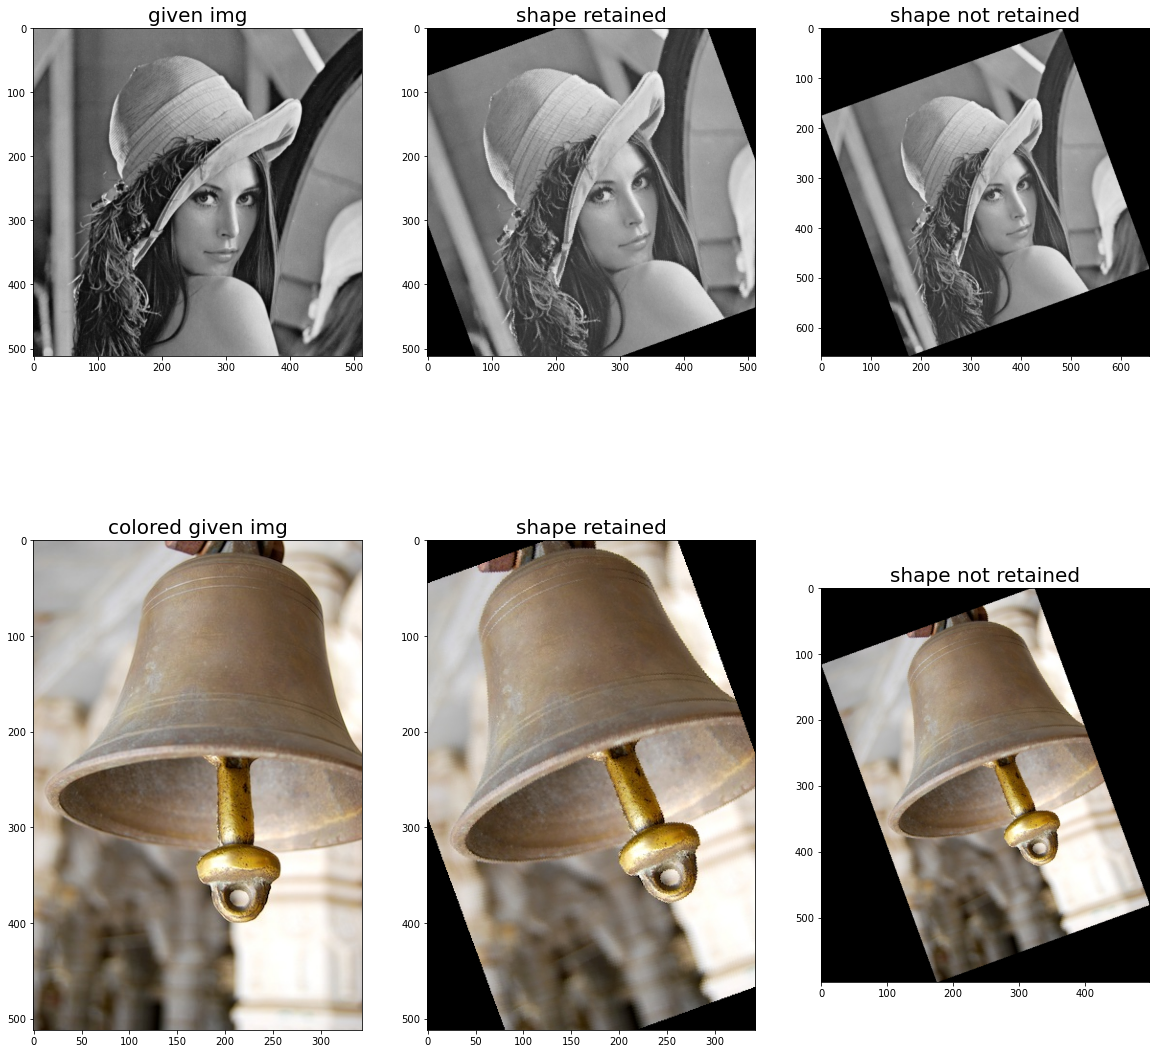

In [7]:
def rotateImage(img, angle, retain):
    if retain:
        res =  Retain(img, angle)
    else:
        res =  noRetain(img, angle)
    return res.astype(np.uint8)

image = cv2.imread('../images/lena.jpg', 0)
images = [image]
titles = ['given img']
ret = rotateImage(image, 20, True)
images.append(ret)
titles.append('shape retained')
noRet = rotateImage(image, 20, False)
images.append(noRet)
titles.append('shape not retained')

img2 = cv2.imread('../images/bell.jpg',cv2.COLOR_BGR2RGB)

images.append(img2)
titles.append('colored given img')

rot = []
for i in range(3):
    rot.append(rotateImage( img2[:,:,i], 20, True))
    
ret_img2 = np.stack([rot[0],rot[1],rot[2]], axis=2 )
images.append(ret_img2)
titles.append('shape retained')

rot = []
for i in range(3):
    rot.append(rotateImage( img2[:,:,i], 20, False))
noRet_img2 = np.stack([rot[0],rot[1],rot[2]], axis=2 )
images.append(noRet_img2)
titles.append('shape not retained')

display_img_arr(images, 2, 3, (20, 20), titles)

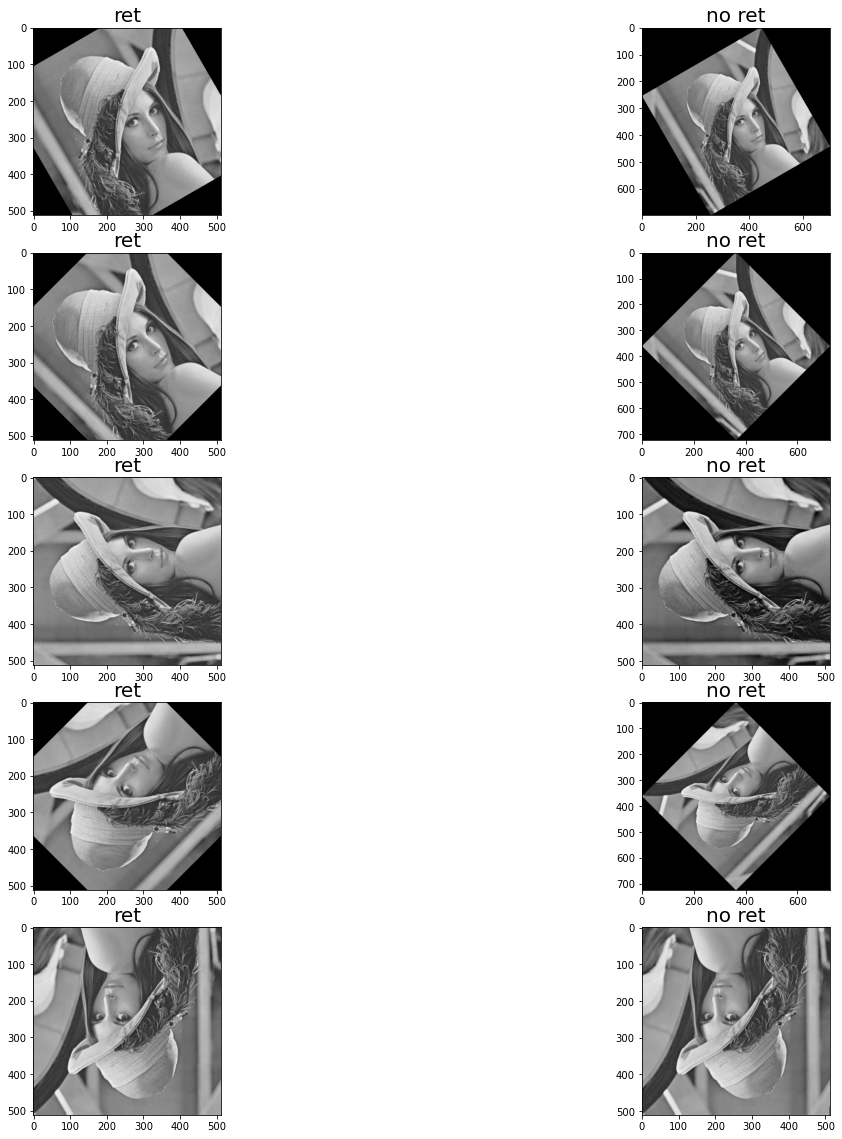

In [8]:
image = cv2.imread('../images/lena.jpg', 0)
angles_lst = [30, 45, 90, 135, 180]
images = []
titles = []
for i in range(len(angles_lst)):
    ret = rotateImage(image, angles_lst[i], True)
    noRet = rotateImage(image, angles_lst[i], False)
    images.append(ret)
    images.append(noRet)
    titles.append('ret')
    titles.append('no ret')
    

display_img_arr(images, 5, 2, (20, 20), titles)